In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization

In [2]:
!conda install tensorflow

^C


In [2]:

import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

#https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end
#https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end

In [3]:
bitcoin_prices = pd.read_csv('Bitcoin - Sheet1.csv')

In [4]:
bitcoin_prices.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,27-Nov-19,7220.88,7619.69,6974.17,7531.66,23991412764,136102712894
1,26-Nov-19,7145.16,7320.23,7098.57,7218.37,21129505542,130429018720
2,25-Nov-19,7039.98,7319.86,6617.17,7146.13,42685231262,129112952930
3,24-Nov-19,7398.63,7408.58,7029.29,7047.92,30433517289,127327398565
4,23-Nov-19,7296.16,7442.26,7151.42,7397.80,21008924418,133636205957


This is testing to see if the numbers came in intergers

In [5]:
bitcoin_prices['Market Cap'][0]

136102712894

In [6]:
bitcoin_prices = bitcoin_prices.assign(Date=pd.to_datetime(bitcoin_prices['Date']))
bitcoin_prices.loc[bitcoin_prices['Volume']=="-",'Volume']=0
bitcoin_prices['Volume'] = bitcoin_prices['Volume'].astype("int64")
bitcoin_prices.columns = bitcoin_prices.columns.str.replace("*", "")
bitcoin_prices.head()

C:\Users\Joseph Chung\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Date,Open,High,Low,Close,Volume,Market Cap
0,2019-11-27,7220.88,7619.69,6974.17,7531.66,23991412764,136102712894
1,2019-11-26,7145.16,7320.23,7098.57,7218.37,21129505542,130429018720
2,2019-11-25,7039.98,7319.86,6617.17,7146.13,42685231262,129112952930
3,2019-11-24,7398.63,7408.58,7029.29,7047.92,30433517289,127327398565
4,2019-11-23,7296.16,7442.26,7151.42,7397.80,21008924418,133636205957


The same was done for the Ethereum dataset.

In [7]:
eth_prices = pd.read_csv('Ethereum - Sheet1.csv')
ethereum_prices = eth_prices.assign(Date=pd.to_datetime(eth_prices['Date']))
eth_prices.loc[eth_prices['Volume']=="-",'Volume']=0
eth_prices['Volume'] = eth_prices['Volume'].astype("int64")
eth_prices.columns = eth_prices.columns.str.replace("*", "")
eth_prices.head()

C:\Users\Joseph Chung\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Date,Open,High,Low,Close,Volume,Market Cap
0,27-Nov-19,148.40,154.89,143.53,153.01,8778095308,16634910472
1,26-Nov-19,146.40,150.00,145.22,148.97,7648516297,16193326033
2,25-Nov-19,142.70,150.21,133.80,146.48,10962753356,15921080564
3,24-Nov-19,153.43,153.97,142.83,142.83,7782769098,15523459920
4,23-Nov-19,150.21,154.10,147.60,153.42,8289198330,16671705910


In [8]:
import sys
from PIL import Image
import io

if sys.version_info[0] < 3:
    import urllib2 as urllib
    bt_img = urllib.urlopen("http://logok.org/wp-content/uploads/2016/10/Bitcoin-Logo-640x480.png")
    eth_img = urllib.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Ethereum_logo_2014.svg/256px-Ethereum_logo_2014.svg.png")
else:
    import urllib
    bt_img = urllib.request.urlopen("http://logok.org/wp-content/uploads/2016/10/Bitcoin-Logo-640x480.png")
    eth_img = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Ethereum_logo_2014.svg/256px-Ethereum_logo_2014.svg.png")

image_file = io.BytesIO(bt_img.read())
bitcoin_im = Image.open(image_file)

image_file = io.BytesIO(eth_img.read())
eth_im = Image.open(image_file)
width_eth_im , height_eth_im  = eth_im.size
eth_im = eth_im.resize((int(eth_im.size[0]*0.8), int(eth_im.size[1]*0.8)), Image.ANTIALIAS)

In [9]:
bitcoin_prices.columns =[bitcoin_prices.columns[0]]+['bt_'+i for i in bitcoin_prices.columns[1:]]
eth_prices.columns =[eth_prices.columns[0]]+['eth_'+i for i in eth_prices.columns[1:]]

In [10]:
bitcoin_prices.columns

Index(['Date', 'bt_Open', 'bt_High', 'bt_Low', 'bt_Close', 'bt_Volume',
       'bt_Market Cap'],
      dtype='object')

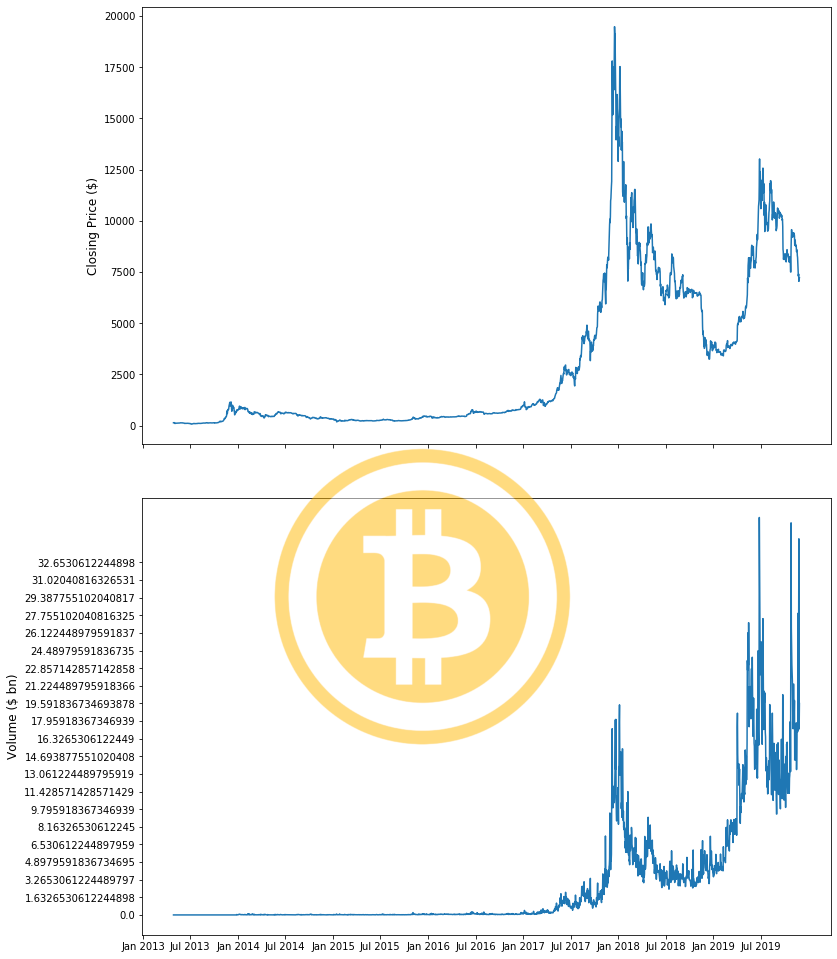

In [11]:
y = np.linspace(0,40,21)
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[1, 1]})
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in y])
ax2.set_yticklabels(2*np.linspace(0,40))
ax1.set_xticks([dt.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([dt.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax2.set_xticklabels([dt.date(i,j,1).strftime('%b %Y')  for i in range(2013,2020) for j in [1,7]])
ax1.plot(bitcoin_prices['Date'],bitcoin_prices['bt_Open'])
ax2.plot(bitcoin_prices['Date'].values, bitcoin_prices['bt_Volume'].values)
fig.tight_layout()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.figimage(bitcoin_im, 100, 120, zorder=0.5,alpha=.5)
plt.show()

ConversionError: Failed to convert value(s) to axis units: 0       27-Nov-19
1       26-Nov-19
2       25-Nov-19
3       24-Nov-19
4       23-Nov-19
          ...    
1569    11-Aug-15
1570    10-Aug-15
1571     9-Aug-15
1572     8-Aug-15
1573     7-Aug-15
Name: Date, Length: 1574, dtype: object

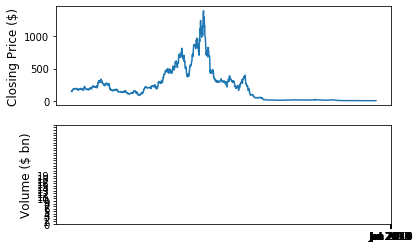

In [12]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[1, 1]})
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax1.set_xticks([dt.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(40)])
ax2.set_yticklabels(range(20))
ax1.set_xticks([dt.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax1.set_xticks([dt.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([dt.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax2.set_xticklabels([dt.date(i,j,1).strftime('%b %Y')  for i in range(2013,2020) for j in [1,7]])
ax1.plot(eth_prices['Date'],eth_prices['eth_Open'])
ax2.bar(eth_prices['Date'], eth_prices['eth_Volume'].values)
fig.tight_layout()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.figimage(eth_im, 300, 180, zorder=0.5, alpha=.6)
plt.show()


In [14]:
market_prices = pd.read_csv('market_info.csv')
for coins in ['bt_', 'eth_']: 
    kwargs = { coins+'day_diff': lambda x: (x[coins+'Close']-x[coins+'Open'])/x[coins+'Open']}
    market_prices = market_prices.assign(**kwargs)
market_prices['Date'] = pd.to_datetime(market_prices['Date']) 

FileNotFoundError: [Errno 2] File market_info.csv does not exist: 'market_info.csv'

NameError: name 'market_prices' is not defined

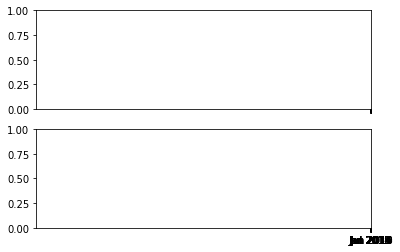

In [13]:

split_date = '2017-06-01'
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_xticks([dt.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([dt.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax2.set_xticklabels([dt.date(i,j,1).strftime('%b %Y')  for i in range(2013,2020) for j in [1,7]])
ax1.plot(market_prices[market_prices['Date'] < split_date]['Date'],
         market_prices[market_prices['Date'] < split_date]['bt_Close'], 
         color='#B08FC7', label='Training')
ax1.plot(market_prices[market_prices['Date'] >= split_date]['Date'],
         market_prices[market_prices['Date'] >= split_date]['bt_Close'], 
         color='#8FBAC8', label='Test')
ax2.plot(market_prices[market_prices['Date'] < split_date]['Date'],
         market_prices[market_prices['Date'] < split_date]['eth_Close'], 
         color='#B08FC7')
ax2.plot(market_prices[market_prices['Date'] >= split_date]['Date'],
         market_prices[market_prices['Date'] >= split_date]['eth_Close'], color='#8FBAC8')
ax1.set_xticklabels('')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
plt.tight_layout()
ax1.legend(bbox_to_anchor=(0.03, 1), loc=2, borderaxespad=0., prop={'size': 14})
fig.figimage(bitcoin_im.resize((int(bitcoin_im.size[0]*0.25), int(bitcoin_im.size[1]*0.25)), Image.ANTIALIAS), 
             250, 180, zorder=3,alpha=.5)
fig.figimage(eth_im.resize((int(eth_im.size[0]*0.25), int(eth_im.size[1]*0.25)), Image.ANTIALIAS), 
             75, 50, zorder=3,alpha=.5)
plt.show()

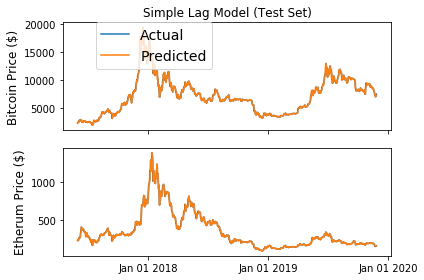

In [15]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_xticks([dt.date(2017+i,1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([dt.date(2017+i,1,1) for i in range(12)])
ax2.set_xticklabels([dt.date(2017+i,1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(market_prices[market_prices['Date']>= split_date]['Date'],
         market_prices[market_prices['Date']>= split_date]['bt_Close'].values, label='Actual')
ax1.plot(market_prices[market_prices['Date']>= split_date]['Date'],
          market_prices[market_prices['Date']>= dt.datetime.strptime(split_date, '%Y-%m-%d') - 
                      dt.timedelta(days=1)]['bt_Close'][1:].values, label='Predicted')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.set_title('Simple Lag Model (Test Set)')
ax2.set_ylabel('Etherum Price ($)',fontsize=12)
ax2.plot(market_prices[market_prices['Date']>= split_date]['Date'],
         market_prices[market_prices['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_prices[market_prices['Date']>= split_date]['Date'],
          market_prices[market_prices['Date']>= dt.datetime.strptime(split_date, '%Y-%m-%d') - 
                      dt.timedelta(days=1)]['eth_Close'][1:].values, label='Predicted')
fig.tight_layout()
plt.show()


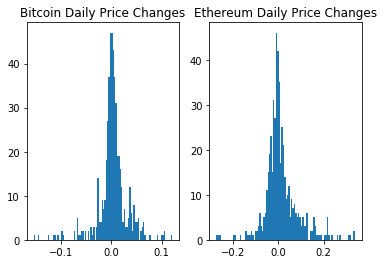

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(market_prices[market_prices['Date']< split_date]['bt_day_diff'].values, bins=100)
ax2.hist(market_prices[market_prices['Date']< split_date]['eth_day_diff'].values, bins=100)
ax1.set_title('Bitcoin Daily Price Changes')
ax2.set_title('Ethereum Daily Price Changes')
plt.show()

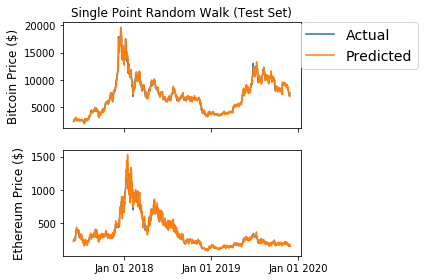

In [17]:
np.random.seed(202)
bt_r_walk_mean, bt_r_walk_sd = np.mean(market_prices[market_prices['Date']< split_date]['bt_day_diff'].values), \
                         np.std(market_prices[market_prices['Date']< split_date]['bt_day_diff'].values)
bt_random_steps = np.random.normal(bt_r_walk_mean, bt_r_walk_sd, 
                (max(market_prices['Date']).to_pydatetime() - dt.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
eth_r_walk_mean, eth_r_walk_sd = np.mean(market_prices[market_prices['Date']< split_date]['eth_day_diff'].values), \
                         np.std(market_prices[market_prices['Date']< split_date]['eth_day_diff'].values)
eth_random_steps = np.random.normal(eth_r_walk_mean, eth_r_walk_sd, 
                (max(market_prices['Date']).to_pydatetime() - dt.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_xticks([dt.date(2017+i,1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([dt.date(2017+i,1,1) for i in range(12)])
ax2.set_xticklabels([dt.date(2017+i,1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(market_prices[market_prices['Date']>= split_date]['Date'],
     market_prices[market_prices['Date']>= split_date]['bt_Close'].values, label='Actual')
ax1.plot(market_prices[market_prices['Date']>= split_date]['Date'],
      market_prices[(market_prices['Date']+ dt.timedelta(days=1))>= split_date]['bt_Close'].values[1:] * 
     (1+bt_random_steps), label='Predicted')
ax2.plot(market_prices[market_prices['Date']>= split_date]['Date'],
     market_prices[market_prices['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_prices[market_prices['Date']>= split_date]['Date'],
      market_prices[(market_prices['Date']+ dt.timedelta(days=1))>= split_date]['eth_Close'].values[1:] * 
     (1+eth_random_steps), label='Predicted')
ax1.set_title('Single Point Random Walk (Test Set)')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.tight_layout()
plt.show()

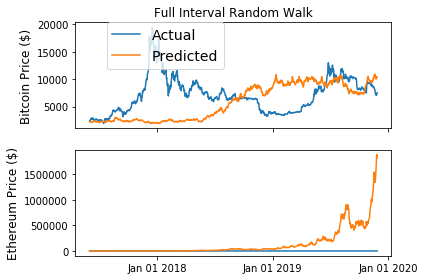

In [18]:
bt_random_walk = []
eth_random_walk = []
for n_step, (bt_step, eth_step) in enumerate(zip(bt_random_steps, eth_random_steps)):
    if n_step==0:
        bt_random_walk.append(market_prices[market_prices['Date']< split_date]['bt_Close'].values[0] * (bt_step+1))
        eth_random_walk.append(market_prices[market_prices['Date']< split_date]['eth_Close'].values[0] * (eth_step+1))
    else:
        bt_random_walk.append(bt_random_walk[n_step-1] * (bt_step+1))
        eth_random_walk.append(eth_random_walk[n_step-1] * (eth_step+1))
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_xticks([dt.date(2017+i,1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([dt.date(2017+i,1,1) for i in range(12)])
ax2.set_xticklabels([dt.date(2017+i,1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(market_prices[market_prices['Date']>= split_date]['Date'],
         market_prices[market_prices['Date']>= split_date]['bt_Close'].values, label='Actual')
ax1.plot(market_prices[market_prices['Date']>= split_date]['Date'],
         bt_random_walk[::-1], label='Predicted')
ax2.plot(market_prices[market_prices['Date']>= split_date]['Date'],
         market_prices[market_prices['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_prices[market_prices['Date']>= split_date]['Date'],
         eth_random_walk[::-1], label='Predicted')

ax1.set_title('Full Interval Random Walk')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.tight_layout()
plt.show()

In [19]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def plot_func(freq):
    np.random.seed(freq)
    random_steps = np.random.normal(eth_r_walk_mean, eth_r_walk_sd, 
                (max(market_prices['Date']).to_pydatetime() - dt.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
    random_walk = []
    for n_step,i in enumerate(random_steps):
        if n_step==0:
            random_walk.append(market_prices[market_prices['Date']< split_date]['eth_Close'].values[0] * (i+1))
        else:
            random_walk.append(random_walk[n_step-1] * (i+1))
    fig, (ax1, ax2) = plt.subplots(2,1)
    ax1.set_xticks([dt.date(2017+i,1,1) for i in range(12)])
    ax1.set_xticklabels('')
    ax2.set_xticks([dt.date(2017+i,1,1) for i in range(12)])
    ax2.set_xticklabels([dt.date(2017+i,1,1).strftime('%b %d %Y')  for i in range(12)])
    ax1.plot(market_prices[market_prices['Date']>= split_date]['Date'],
         market_prices[market_prices['Date']>= split_date]['eth_Close'].values, label='Actual')
    ax1.plot(market_prices[market_prices['Date']>= split_date]['Date'],
          market_prices[(market_prices['Date']+ dt.timedelta(days=1))>= split_date]['eth_Close'].values[1:] * 
         (1+random_steps), label='Predicted')
    ax2.plot(market_prices[market_prices['Date']>= split_date]['Date'],
          market_prices[(market_prices['Date']+ dt.timedelta(days=1))>= split_date]['eth_Close'].values[1:] * 
         (1+random_steps))
    ax2.plot(market_prices[market_prices['Date']>= split_date]['Date'],
             random_walk[::-1])
    ax1.set_title('Single Point Random Walk')
    ax1.set_ylabel('')
    # for static figures, you may wish to insert the random seed value
#    ax1.annotate('Random Seed: %d'%freq, xy=(0.75, 0.2),  xycoords='axes fraction',
#            xytext=(0.75, 0.2), textcoords='axes fraction')
    ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
    ax2.set_title('Full Interval Random Walk')
    fig.text(0.0, 0.5, 'Ethereum Price ($)', va='center', rotation='vertical',fontsize=12)
    plt.tight_layout()
#    plt.savefig('image%d.png'%freq, bbox_inches='tight')
    plt.show()
    
interact(plot_func, freq =widgets.IntSlider(min=200,max=210,step=1,value=205, description='Random Seed:'))

interactive(children=(IntSlider(value=205, description='Random Seed:', max=210, min=200), Output()), _dom_clas…

<function __main__.plot_func(freq)>

In [20]:
for coins in ['bt_', 'eth_']: 
    kwargs = { coins+'close_off_high': lambda x: 2*(x[coins+'High']- x[coins+'Close'])/(x[coins+'High']-x[coins+'Low'])-1,
            coins+'volatility': lambda x: (x[coins+'High']- x[coins+'Low'])/(x[coins+'Open'])}
    market_prices = market_prices.assign(**kwargs)

In [21]:
model_data = market_prices[['Date']+[coin+metric for coin in ['bt_', 'eth_'] 
                                   for metric in ['Close','Volume','close_off_high','volatility']]]
model_data = model_data.sort_values(by='Date')
model_data.head()

,Date,bt_Close,bt_Volume,bt_close_off_high,bt_volatility,eth_Close,eth_Volume,eth_close_off_high,eth_volatility
1426,2016-01-01,434.33,36278900,-0.560137,0.020268,0.948024,206062,-0.418477,0.025040
1425,2016-01-02,433.44,30096600,0.250597,0.009641,0.937124,255504,0.965898,0.034913
1424,2016-01-03,430.01,39633800,-0.173865,0.020827,0.971905,407632,-0.317885,0.060792
1423,2016-01-04,433.09,38477500,-0.474265,0.012649,0.954480,346245,-0.057657,0.047943
1422,2016-01-05,431.96,34522600,-0.013333,0.010391,0.950176,219833,0.697930,0.025236


In [22]:
training_set, test_set = model_data[model_data['Date']<split_date], model_data[model_data['Date']>=split_date]
training_set = training_set.drop('Date', 1)
test_set = test_set.drop('Date', 1)

In [23]:
window_len = 10
norm_cols = [coin+metric for coin in ['bt_', 'eth_'] for metric in ['Close','Volume']]

LSTM_training_inputs = []

for i in range(len(training_set)-window_len):
    temp_set = training_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_training_inputs.append(temp_set)
LSTM_training_outputs = (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1

In [24]:
LSTM_test_inputs = []
for i in range(len(test_set)-window_len):
    temp_set = test_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_test_inputs.append(temp_set)
LSTM_test_outputs = (test_set['eth_Close'][window_len:].values/test_set['eth_Close'][:-window_len].values)-1

LSTM_training_inputs[0]

,bt_Close,bt_Volume,bt_close_off_high,bt_volatility,eth_Close,eth_Volume,eth_close_off_high,eth_volatility
1426,0.000000,0.000000,-0.560137,0.020268,0.000000,0.000000,-0.418477,0.025040
1425,-0.002049,-0.170410,0.250597,0.009641,-0.011498,0.239937,0.965898,0.034913
1424,-0.009946,0.092475,-0.173865,0.020827,0.025190,0.978201,-0.317885,0.060792
1423,-0.002855,0.060603,-0.474265,0.012649,0.006810,0.680295,-0.057657,0.047943
1422,-0.005457,-0.048411,-0.013333,0.010391,0.002270,0.066829,0.697930,0.025236
1421,-0.012019,-0.061645,-0.003623,0.012782,0.002991,0.498534,-0.214540,0.026263
1420,0.054613,1.413585,-0.951499,0.069045,-0.006349,2.142074,0.681644,0.040587
1419,0.043515,0.570968,0.294196,0.032762,0.040890,1.647747,-0.806717,0.055274
1418,0.030576,-0.110282,0.814194,0.017094,0.040937,0.098121,-0.411897,0.019021
1417,0.031451,-0.007801,-0.919598,0.017758,0.054014,0.896944,-0.938235,0.025266


In [25]:
LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
LSTM_training_inputs = np.array(LSTM_training_inputs)

LSTM_test_inputs = [np.array(LSTM_test_inputs) for LSTM_test_inputs in LSTM_test_inputs]
LSTM_test_inputs = np.array(LSTM_test_inputs)

In [26]:
LSTM_training_inputs

array([[[ 0.00000000e+00,  0.00000000e+00, -5.60137457e-01, ...,
          0.00000000e+00, -4.18477331e-01,  2.50398410e-02],
        [-2.04913315e-03, -1.70410349e-01,  2.50596659e-01, ...,
          2.39937495e-01,  9.65897754e-01,  3.49134105e-02],
        [-9.94635415e-03,  9.24752404e-02, -1.73864895e-01, ...,
          9.78200736e-01, -3.17884625e-01,  6.07919610e-02],
        ...,
        [ 4.35152994e-02,  5.70968249e-01,  2.94196131e-01, ...,
          1.64774679e+00, -8.06716561e-01,  5.52743457e-02],
        [ 3.05758294e-02, -1.10281734e-01,  8.14193548e-01, ...,
          9.81209539e-02, -4.11896506e-01,  1.90207823e-02],
        [ 3.14507402e-02, -7.80067753e-03, -9.19597990e-01, ...,
          8.96943638e-01, -9.38235412e-01,  2.52659156e-02]],

       [[ 0.00000000e+00,  0.00000000e+00,  2.50596659e-01, ...,
          0.00000000e+00,  9.65897754e-01,  3.49134105e-02],
        [-7.91343669e-03,  3.16886293e-01, -1.73864895e-01, ...,
          5.95403594e-01, -3.17884625e

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout


def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()

    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

In [28]:
np.random.seed(202)
eth_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
LSTM_training_outputs = (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1
eth_history = eth_model.fit(LSTM_training_inputs, LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Train on 507 samples
Epoch 1/50
507/507 - 8s - loss: 0.1610
Epoch 2/50
507/507 - 4s - loss: 0.1189
Epoch 3/50
507/507 - 5s - loss: 0.1026
Epoch 4/50
507/507 - 5s - loss: 0.0889
Epoch 5/50
507/507 - 5s - loss: 0.0839
Epoch 6/50
507/507 - 5s - loss: 0.0864
Epoch 7/50
507/507 - 5s - loss: 0.0853
Epoch 8/50
507/507 - 5s - loss: 0.0821
Epoch 9/50
507/507 - 5s - loss: 0.0793
Epoch 10/50
507/507 - 5s - loss: 0.0749
Epoch 11/50
507/507 - 5s - loss: 0.0762
Epoch 12/50
507/507 - 5s - loss: 0.0771
Epoch 13/50
507/507 - 5s - loss: 0.0768
Epoch 14/50
507/507 - 5s - loss: 0.0747
Epoch 15/50
507/507 - 4s - loss: 0.0731
Epoch 16/50
507/507 - 5s - loss: 0.0708
Epoch 17/50
507/507 - 5s - loss: 0.0677
Epoch 18/50
507/507 - 5s - loss: 0.0702
Epoch 19/50
507/507 - 5s - loss: 0.0700
Epoch 20/50
507/507 - 5s - loss: 0.0708
Epoch 21/50
507/507 - 5s - loss: 0.0711
Epoch 22/50
507/507 - 4s - loss: 0.0656
Epoch 23/50
507/507 - 4s - loss: 0.0678
Epoch 24/50
507/507 - 5s - loss: 0.0707
Epoch 25/50
507/507 - 5s - l